In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pickle

In [2]:
df = pd.read_csv('preprocessed_weather_data.csv')

In [3]:
df.columns

Index(['Visibility (km)', 'Wind Speed (km/h)', 'Humidity', 'Temperature (C)',
       'Apparent Temperature (C)', 'Pressure (millibars)',
       'Wind Bearing (degrees)', 'Summary'],
      dtype='object')

In [4]:
features =['Visibility (km)', 'Humidity', 'Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Wind Bearing (degrees)']
target = 'Summary'

In [5]:
df = df[features + [target]].dropna()

In [6]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [18]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

                  Clear       0.73      0.81      0.77      6194
                Drizzle       1.00      1.00      1.00      5961
                    Dry       1.00      1.00      1.00      6185
  Dry and Mostly Cloudy       1.00      1.00      1.00      6150
  Dry and Partly Cloudy       0.99      1.00      1.00      6083
                  Foggy       1.00      1.00      1.00      6178
Humid and Mostly Cloudy       0.99      1.00      1.00      6106
     Humid and Overcast       1.00      1.00      1.00      6112
Humid and Partly Cloudy       1.00      1.00      1.00      6127
             Light Rain       1.00      1.00      1.00      6064
          Mostly Cloudy       0.58      0.50      0.53      6106
               Overcast       0.74      0.81      0.77      6246
          Partly Cloudy       0.59      0.54      0.56      6031
                   Rain       1.00      1.00      1.00      6199


In [19]:
# Step 7: Save the model in Pickle format
with open('rf_model.pkl', 'wb') as pkl_file:
    pickle.dump(rf_model, pkl_file)
print("Model saved as rf_model.pkl")

Model saved as rf_model.pkl


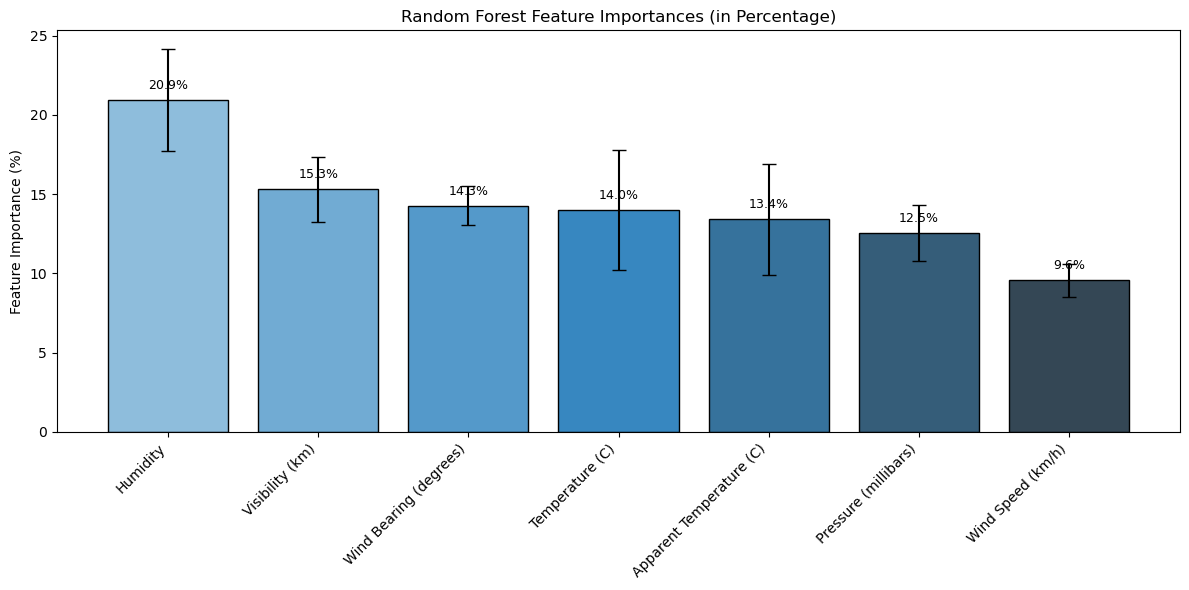

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Step 11: Visualize feature importances in percentage
importances = rf_model.feature_importances_
importances_percent = 100.0 * (importances / importances.sum())  # Convert to percentage
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0) * 100

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance (%)': importances_percent,
    'Std (%)': std
}).sort_values(by='Importance (%)', ascending=False)

# Set color palette
palette = sns.color_palette("Blues_d", len(importance_df))

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(importance_df['Feature'], importance_df['Importance (%)'],
               yerr=importance_df['Std (%)'], capsize=5,
               color=palette, edgecolor='black')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance (%)')
plt.title('Random Forest Feature Importances (in Percentage)')
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Function to evaluate model
def evaluate_model(model, X, y, dataset_name=""):
    y_pred = model.predict(X)
    
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"\n📊 {dataset_name} Evaluation Metrics:")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

    # Confusion Matrix
    conf_mat = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(cmap='Blues')
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.show()
